### Step 1:
Load the dataset

In [1]:
import pandas as pd
trip_advi_df = pd.read_csv(r'C:\Users\SNEHA\Desktop\Machine learning\Clustering\Kmeans\tripadvisor_review.csv')
trip_advi_df

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10
0,User 1,0.93,1.80,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,User 2,1.02,2.20,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,User 3,1.22,0.80,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,User 4,0.45,1.80,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,User 5,0.51,1.20,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54
...,...,...,...,...,...,...,...,...,...,...,...
975,User 976,0.74,1.12,0.30,0.53,0.88,1.38,3.17,2.78,0.99,3.20
976,User 977,1.25,0.92,1.12,0.38,0.78,1.68,3.18,2.79,1.34,2.80
977,User 978,0.61,1.32,0.67,0.43,1.30,1.78,3.17,2.81,1.34,3.02
978,User 979,0.93,0.20,0.13,0.43,0.30,0.40,3.18,2.98,1.12,2.46


In [2]:
trip_Final=trip_advi_df.copy()

In [3]:
trip_advi_df.columns

Index(['User_ID', 'Category_1', 'Category_2', 'Category_3', 'Category_4',
       'Category_5', 'Category_6', 'Category_7', 'Category_8', 'Category_9',
       'Category_10'],
      dtype='object')

####  Removing Unnecessary variable

In [4]:
# forget about the users for the moment - we'll use this later
del trip_advi_df['User_ID']

In [5]:
trip_advi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Category_1   980 non-null    float64
 1   Category_2   980 non-null    float64
 2   Category_3   980 non-null    float64
 3   Category_4   980 non-null    float64
 4   Category_5   980 non-null    float64
 5   Category_6   980 non-null    float64
 6   Category_7   980 non-null    float64
 7   Category_8   980 non-null    float64
 8   Category_9   980 non-null    float64
 9   Category_10  980 non-null    float64
dtypes: float64(10)
memory usage: 76.7 KB


In [6]:
trip_advi_df.head()

,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### Step 2:
Extract the measurements from the DataFrame using its .values attribute:

In [7]:
samples = trip_advi_df.values # get all row and columne with header 

samples

array([[0.93, 1.8 , 2.29, ..., 2.79, 1.82, 2.42],
       [1.02, 2.2 , 2.66, ..., 2.63, 1.86, 2.32],
       [1.22, 0.8 , 0.54, ..., 2.8 , 1.31, 2.5 ],
       ...,
       [0.61, 1.32, 0.67, ..., 2.81, 1.34, 3.02],
       [0.93, 0.2 , 0.13, ..., 2.98, 1.12, 2.46],
       [0.93, 0.56, 1.13, ..., 2.87, 1.34, 2.4 ]])

### Step 3:
1. Measure the quality of clusterings with different numbers of clusters using the inertia. 

2. For each of the given values of k, perform the following steps:
3. Create a KMeans instance called model with k clusters.
4. Fit the model to the grain data samples.
5. Append the value of the inertia_ attribute of model to the list inertias.

In [8]:
SSE=[]
SSE

[]

In [9]:
from sklearn.cluster import KMeans

ks = range(1,6)   #ks=1,2,3,4,5 (n-1)
SSE = [] # within-cluster sum-of-squares ( empty list)


#k=ks=

for k in ks:  # k = 1,2,3,4,5
    # Create a KMeans instance with k clusters:
    
    model = KMeans(n_clusters=k)

    # Fit model to samples
    model.fit(samples)

    # Append the inertia to the list of inertias
    SSE.append(model.inertia_) 
    # Inertia: Sum of distances of samplesto their closest cluster center

In [10]:
SSE

[1736.186814387756,
 1179.7534432777666,
 1052.3879647433312,
 961.6754023428192,
 891.2636273913945]

#### Elbow Method 

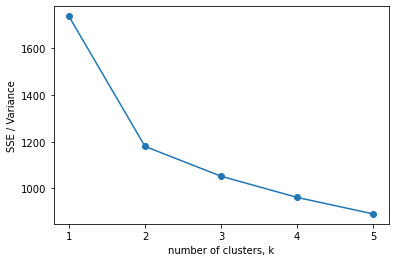

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot ks vs inertias
plt.plot(ks, SSE, '-o') # -o is point in graph to identify the cluster
plt.xlabel('number of clusters, k')
plt.ylabel('SSE / Variance')
plt.xticks(ks) # to get exact number of cluster without decimal
plt.show()

Plot the inertia to see which number of clusters is best. Remember: lower numbers are better!

# Model or Algorithm

In [12]:
model2 = KMeans(n_clusters=3,max_iter=100)

In [13]:
trip_Final['Cluster_Made'] = model2.fit_predict(samples)
trip_Final.head()

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Cluster_Made
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,0
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,0
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


### Final Cluster Centorids 

In [14]:
model2.cluster_centers_

array([[0.8755597 , 1.38597015, 2.09406716, 0.56261194, 1.1188806 ,
        2.06223881, 3.18925373, 2.795     , 1.52268657, 2.58522388],
       [0.88667458, 1.26622328, 0.49776722, 0.45695962, 0.65558195,
        1.41377672, 3.17634204, 2.84391924, 1.57389549, 2.97627078],
       [0.91886598, 1.44687285, 0.76381443, 0.61405498, 1.18584192,
        2.26171821, 3.17993127, 2.85914089, 1.60604811, 2.74017182]])

In [15]:
trip_Final.head()

,User_ID,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,Category_10,Cluster_Made
0,User 1,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42,0
1,User 2,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32,0
2,User 3,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50,1
3,User 4,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86,1
4,User 5,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54,2


In [16]:
trip_Final.loc[:,['User_ID','Cluster_Made']]

,User_ID,Cluster_Made
0,User 1,0
1,User 2,0
2,User 3,1
3,User 4,1
4,User 5,2
...,...,...
975,User 976,1
976,User 977,1
977,User 978,2
978,User 979,1


In [17]:
trip_Final.Cluster_Made.value_counts(ascending=False)

1    421
2    291
0    268
Name: Cluster_Made, dtype: int64

In [19]:
import os
os.chdir(r"C:\Users\SNEHA\Desktop\Machine learning\Clustering\Kmeans")

In [20]:
trip_Final.to_excel("Trip_output.xlsx",index=False,sheet_name="sneha") 